# 演習課題
**問題**
10000までの**素数**を表示するプログラムを書いてください。
素数：1,2,3,5,7

発展
スピードアップを図ってください

In [ ]:
%%timeit
a = 1

 - アルゴリズムを文章で書く
 - コードを書く-> まず動く -> リファクタリング

**解答**

アルゴリズム

例えば10の時
 - 2,3,4,5,6,7,8,9,で割り算して、あまりをチェック
 - もし一つでも余りが0になっていれば合成数
 - すべてあまりが0でなければ、素数



 - 素数を格納するnumbersという空のリストで初期化
 - iを1～10000まで繰り返す
     - 素数判定フラグをTrueに初期化
     - 2, ....,i/2の数値でまでで割り切れたらフラグをFalse
     - すべての値で10より小さな値で計算して、フラグがTrueのままであれば素数
     - 素数であればnumbers

In [6]:
def get_prime_numbers(max_val):
    numbers = []
    for i in range(1,max_val+1):
        flag = True

        for j in range(2,i):
            if i % j == 0:
                flag = False
        # 素数の場合
        if flag:
            numbers.append(i)
    
    return numbers

In [9]:
numbers = get_prime_numbers(100)
numbers

[1,
 2,
 3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97]

In [ ]:
%%timeit
numbers = get_prime_numbers(10)

In [13]:
%%timeit
numbers = get_prime_numbers(100)

In [23]:
%%timeit
numbers = get_prime_numbers(1000)

96.4 ns ± 9.8 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [ ]:
%%timeit
numbers = get_prime_numbers(10000)

**計算量(オーダー)**
$n = 10$
 - $O(n) <- 10倍すると、計算量も10倍$
 - $O(n^2) <- 10倍すると、計算量が100倍$
 - $O(n^3) <- 10倍すると、計算量が1000倍$

In [15]:
% matplotlib inline
import matplotlib.pyplot as plt

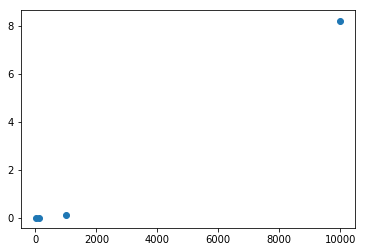

In [16]:
max_val = [10,100,1000,10000]
times = [31*1e-6, 1.06*1e-3, 91*1e-3, 8.22]

plt.scatter(max_val, times)

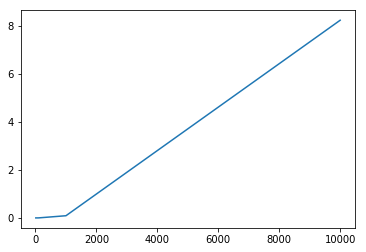

In [17]:
max_val = [10,100,1000,10000]
times = [31*1e-6, 1.06*1e-3, 91*1e-3, 8.22]

plt.plot(max_val, times)

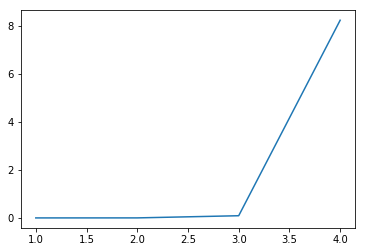

In [19]:
# 片対数グラフ
max_val = [1,2,3,4]
times = [31*1e-6, 1.06*1e-3, 91*1e-3, 8.22]

plt.plot(max_val, times)

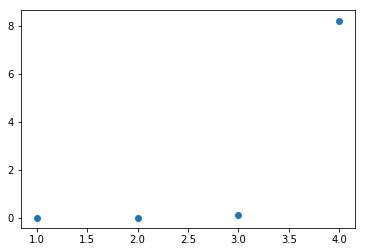

In [20]:
# 片対数グラフ
max_val = [1,2,3,4]
times = [31*1e-6, 1.06*1e-3, 91*1e-3, 8.22]

plt.scatter(max_val, times)

## 高速化を検討
例えば10の時
 - 2,3,4,5,6,7,8,9,で割り算して、あまりをチェック
 - もし一つでも余りが0になっていれば合成数
 - すべてあまりが0でなければ、素数

アルゴリズム
 - 素数を格納するnumbersという空のリストで初期化
 - iを1～10000まで繰り返す
     - 素数判定フラグをTrueに初期化
     - 2, ....,i/2の数値でまでで割り切れたらフラグをFalse + その時点で抜ける(break)
     - すべての値で10より小さな値で計算して、フラグがTrueのままであれば素数
     - 素数であればnumbers

In [22]:
def get_prime_numbers(max_val):
    numbers = []
    for i in range(1,max_val+1):
        flag = True

        for j in range(2,i):
            if i % j == 0:
                flag = False
                break
        # 素数の場合
        if flag:
            numbers.append(i)
    
    return numbers

In [26]:
numbers = get_prime_numbers(10000)

In [27]:
%%timeit
numbers

85.4 ns ± 3.4 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


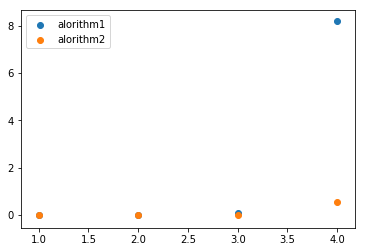

In [30]:
# 片対数グラフ
max_val = [1,2,3,4]
times1 = [31*1e-6, 1.06*1e-3, 91*1e-3, 8.22]
times2 = [4.56*1e-6, 83.2*1e-6, 4.63*1e-3, 535*1e-3]

plt.scatter(max_val, times1, label="alorithm1")
plt.scatter(max_val, times2, label="alorithm2")
plt.legend()

## 高速化2を検討
例えば49の時
 - (1を抜く)2,3,(4),5,(6),7 | 8,9,で割り算して、あまりをチェック
 - もし一つでも余りが0になっていれば合成数
 - すべてあまりが0でなければ、素数

アルゴリズム
 - 素数を格納するnumbersという空のリストで初期化
 - iを1～10000まで繰り返す
     - 素数判定フラグをTrueに初期化
     - jをnumbers(既に持っている素数)の数値でまでで割り切れたらフラグをFalse + その時点で抜ける(break)
     - すべての値で10より小さな値で計算して、フラグがTrueのままであれば素数
     - 素数であればnumbers

In [33]:
def get_prime_numbers(max_val):
    numbers = []
    for i in range(2,max_val+1):
        flag = True

        #for j in range(2,i):
        for j in numbers:
            if i % j == 0:
                flag = False
                break
        # 素数の場合
        if flag:
            numbers.append(i)
    numbers.insert(0,1) # 1を先頭に追加
    return numbers

In [38]:
%%timeit
numbers = get_prime_numbers(10)

7.05 µs ± 1.42 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [39]:
%%timeit
numbers = get_prime_numbers(100)

76.5 µs ± 9.48 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [40]:
%%timeit
numbers = get_prime_numbers(1000)

2.35 ms ± 207 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [41]:
%%timeit
numbers = get_prime_numbers(10000)

116 ms ± 10.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


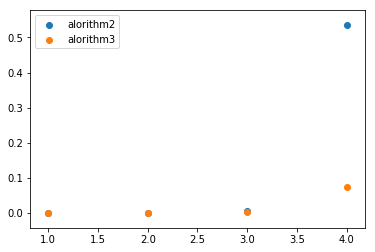

In [43]:
# 片対数グラフ
max_val = [1,2,3,4]
times1 = [31*1e-6, 1.06*1e-3, 91*1e-3, 8.22]
times2 = [4.56*1e-6, 83.2*1e-6, 4.63*1e-3, 535*1e-3]
times3 = [3.93*1e-6, 57.3*1e-6, 1.69*1e-3, 75.1*1e-3]

# plt.scatter(max_val, times1, label="alorithm1")
plt.scatter(max_val, times2, label="alorithm2")
plt.scatter(max_val, times3, label="alorithm3")
plt.legend()